In [1]:
import sys
print(sys.version)

3.9.6 (default, Sep 26 2022, 11:37:49) 
[Clang 14.0.0 (clang-1400.0.29.202)]


In [60]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog
import numpy as np
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report as cls_report

In [9]:
D_train = pd.read_csv(filedialog.askopenfilename(), header=None)

2023-05-31 16:13:59.666 Python[864:11705] +[CATransaction synchronize] called within transaction


In [11]:
D_test = pd.read_csv(filedialog.askopenfilename(), header = None)

2023-05-31 16:15:22.827 Python[864:11705] +[CATransaction synchronize] called within transaction


In [12]:
column_names = ["F_Type"] + [f"Pix{i}" for i in range(1, 785)]

In [13]:
D_train.columns = column_names

In [14]:
D_test.columns = column_names

In [20]:
# Define the mapping dictionary
train_label_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Replace the values in the column with their corresponding labels
D_train['F_Type'] = D_train['F_Type'].map(train_label_mapping)


In [21]:
# Define the mapping dictionary
test_label_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Replace the values in the column with their corresponding labels
D_test['F_Type'] = D_test['F_Type'].map(test_label_mapping)

In [23]:
D_test.head()

,F_Type,Pix1,Pix2,Pix3,Pix4,Pix5,Pix6,Pix7,Pix8,Pix9,...,Pix775,Pix776,Pix777,Pix778,Pix779,Pix780,Pix781,Pix782,Pix783,Pix784
0,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pullover,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,Trouser,0,0,0,0,0,0,0,0,1,...,164,58,0,0,0,0,0,0,0,0
3,Trouser,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Shirt,0,0,0,2,0,1,1,0,0,...,71,12,0,0,0,0,0,0,0,0


In [24]:
# Compute the frequency table
D_train['F_Type'] = D_train['F_Type'].astype('category')
frequency_table = D_train['F_Type'].value_counts()
print(frequency_table)


# Compute the proportion table
proportion_table = frequency_table / frequency_table.sum()

# Compute the rounded percentages
rounded_percentages = np.round(proportion_table * 100, decimals=1)

print(rounded_percentages)

F_Type
Ankle boot     6000
Bag            6000
Coat           6000
Dress          6000
Pullover       6000
Sandal         6000
Shirt          6000
Sneaker        6000
T-shirt/top    6000
Trouser        6000
Name: count, dtype: int64
F_Type
Ankle boot     10.0
Bag            10.0
Coat           10.0
Dress          10.0
Pullover       10.0
Sandal         10.0
Shirt          10.0
Sneaker        10.0
T-shirt/top    10.0
Trouser        10.0
Name: count, dtype: float64


In [25]:
D_train.shape

(60000, 785)

In [26]:
#Normalizing Train Data

# Select the numeric columns in the DataFrame
train_numeric_columns = D_train.iloc[:, 1:785]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the data using the MinMaxScaler
train_normalized_data = scaler.fit_transform(train_numeric_columns)

# Create a new DataFrame with the normalized data
train_NormData = pd.DataFrame(train_normalized_data, columns=train_numeric_columns.columns)

       Pix1  Pix2  Pix3  Pix4  Pix5      Pix6  Pix7  Pix8      Pix9     Pix10  \
0       0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.000000  0.000000   
1       0.0   0.0   0.0   0.0   0.0  0.004348   0.0   0.0  0.000000  0.000000   
2       0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.000000  0.086275   
3       0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.129921  0.376471   
4       0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.000000  0.000000   
...     ...   ...   ...   ...   ...       ...   ...   ...       ...       ...   
59995   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.000000  0.000000   
59996   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.000000  0.000000   
59997   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.000000  0.019608   
59998   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.000000  0.000000   
59999   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.000000  0.000000   

       ...    Pix775    Pix

In [27]:
#Normalizing Test Data

# Select the numeric columns in the DataFrame
test_numeric_columns = D_test.iloc[:, 1:785]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the data using the MinMaxScaler
test_normalized_data = scaler.fit_transform(test_numeric_columns)

# Create a new DataFrame with the normalized data
test_NormData = pd.DataFrame(test_normalized_data, columns=test_numeric_columns.columns)

      Pix1  Pix2  Pix3      Pix4  Pix5      Pix6      Pix7  Pix8      Pix9  \
0      0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0  0.000000   
1      0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0  0.000000   
2      0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0  0.004219   
3      0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0  0.000000   
4      0.0   0.0   0.0  0.010811   0.0  0.004425  0.004464   0.0  0.000000   
...    ...   ...   ...       ...   ...       ...       ...   ...       ...   
9995   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0  0.000000   
9996   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0  0.000000   
9997   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0  0.000000   
9998   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0  0.000000   
9999   0.0   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0  0.000000   

         Pix10  ...    Pix775    Pix776  Pix777    Pix778    Pi

In [28]:
X_train = train_NormData
y_train = D_train.iloc[:,0]
X_test = test_NormData
y_test = D_test.iloc[:,0]

k = 2 - Elapsed Time: 21.570296049118042 seconds
Accuracy: 0.84
k = 3 - Elapsed Time: 19.379680156707764 seconds
Accuracy: 0.85
k = 4 - Elapsed Time: 20.008131980895996 seconds
Accuracy: 0.86
k = 5 - Elapsed Time: 19.671951055526733 seconds
Accuracy: 0.85
k = 6 - Elapsed Time: 23.439640045166016 seconds
Accuracy: 0.85
k = 7 - Elapsed Time: 22.32546091079712 seconds
Accuracy: 0.85
k = 8 - Elapsed Time: 23.65029001235962 seconds
Accuracy: 0.85
k = 9 - Elapsed Time: 22.126495122909546 seconds
Accuracy: 0.85
k = 10 - Elapsed Time: 21.349702835083008 seconds
Accuracy: 0.85
k = 11 - Elapsed Time: 19.349666833877563 seconds
Accuracy: 0.85
k = 12 - Elapsed Time: 22.052664041519165 seconds
Accuracy: 0.85
k = 13 - Elapsed Time: 22.233556032180786 seconds
Accuracy: 0.85
k = 14 - Elapsed Time: 22.67150592803955 seconds
Accuracy: 0.85
k = 15 - Elapsed Time: 19.874178171157837 seconds
Accuracy: 0.85
k = 16 - Elapsed Time: 21.206053256988525 seconds
Accuracy: 0.85
k = 17 - Elapsed Time: 20.0215108394

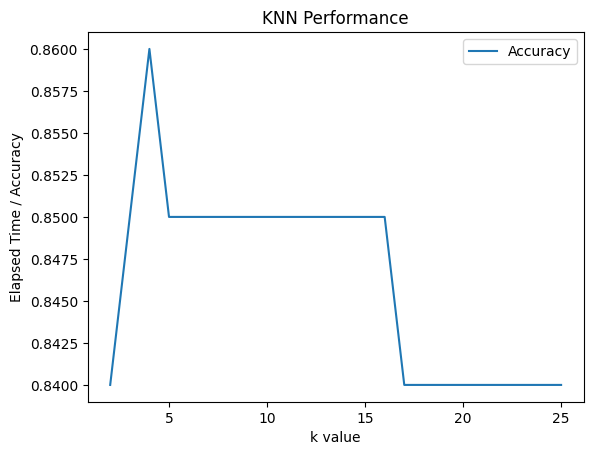

In [69]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import time

# Specify the range of k values
start_k = 2
end_k = 25



# Initialize lists to store k values, elapsed times, and accuracies
k_values = []
elapsed_times = []
accuracies = []

# Loop over different values of k
for k in range(start_k, end_k+1):
    
    # Start the timer
    start_time = time.time()
    # Train the KNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)


    # Print the elapsed time and the current k value
    print("k =", k, "- Elapsed Time:", elapsed_time, "seconds")

    # Make predictions on the testing set
    D_pred = knn_model.predict(X_test)

    # Calculate the elapsed time for each iteration
    elapsed_time = time.time() - start_time

    # Calculate evaluation metrics
    classification_results = cls_report(y_test, D_pred)
    report_lines = classification_results.split('\n')
    accuracy_line = next((line for line in report_lines if 'accuracy' in line.lower()), None)

    if accuracy_line is not None:
        # Extract accuracy value
        accuracy = accuracy_line.split()[1]
        print("Accuracy:", accuracy)
    else:
        print("Accuracy information not found in the classification report.")
        continue

    # Store the k value, elapsed time, and accuracy in the lists
    k_values.append(k)
    elapsed_times.append(elapsed_time)
    accuracies.append(float(accuracy))

# Plot the line graph
# plt.plot(k_values, elapsed_times, label='Elapsed Time')
plt.plot(k_values, accuracies*100, label='Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy %')
plt.title('KNN Performance')
plt.legend()
plt.show()



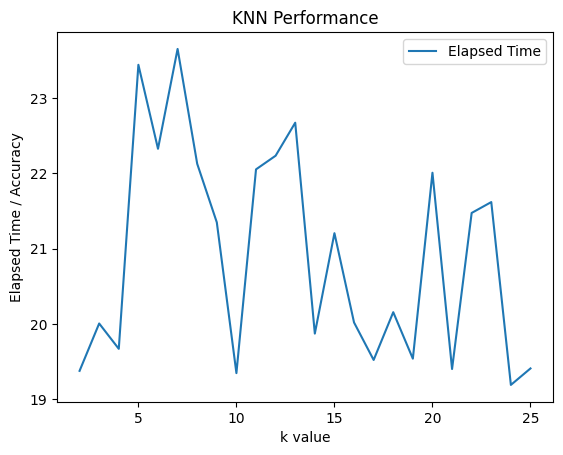

In [71]:
# Plot the line graph
plt.plot(k_values, elapsed_times, label='Elapsed Time')
#plt.plot(k_values, accuracies, label='Accuracy')
plt.xlabel('k value')
plt.ylabel('Elapsed Time / Accuracy')
plt.title('KNN Performance')
plt.legend()
plt.show()